<a href="https://colab.research.google.com/github/chacha715/ESAA/blob/main/mini_project_%EC%B0%A8%EB%AF%BC%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**미니 프로젝트 : 2010년대 영화 산업 현황**
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

- 조건: 변수 2개 이상 연결한 결과값 포함

##**1. 라이브러리 및 데이터**

In [89]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# 데이터 불러오기
train=pd.read_csv("/content/drive/MyDrive/ESAA/22-2/DATA/movies_train.csv")

##**2. 탐색적 자료분석(EDA)**

###**1) 데이터 미리보기**

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


###**2) 데이터 확인**

##### **변수 설명**
+ `title` : 영화의 제목
+ `distributor` : 배급사
+ `genre` : 장르
+ `release_time` : 개봉일
+ `time` : 상영시간(분)
+ `screening_rat` : 상영등급
+ `director` : 감독이름
+ `dir_prev_bfnum` : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ `dir_prev_num` : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ `num_staff` : 스텝수
+ `num_actor` : 주연배우수
+ `box_off_num` : 관객수

In [ ]:
print(train.shape)

(600, 12)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


###**3) 결측치 확인 및 데이터 전처리**

In [ ]:
#결측치 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()) #모두 dir_prev_num이 0이다

0


In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
#release_time을 int -> datatime 형태로 변환
train['release_time']=pd.to_datetime(train['release_time'])

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


1. 5-1 파이차트로 바꾸기
2. NaN 처리하기
3. 하위그룹 묶어서 하나 더 분석하기

### **5) 영화 배급사 분석**

#### **5-1) 배급사별 장르 추이: 상위 6개**

In [ ]:
#영화를 가장 많이 제작하는 배급사 top10
train['distributor'].value_counts().sort_values(ascending=False)[:10]

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
Name: distributor, dtype: int64

In [ ]:
#배급사별 자료 정렬
train_top6 = train['distributor'].value_counts().head(6)

train_dt_genre = train.groupby(['distributor', 'genre'])['title'].count().reset_index()
train_dt_genre.columns = ['distributor', 'genre', 'num_movies']

train_distributor_genre = train_dt_genre[train_dt_genre['distributor'].isin(train_top6.index)].copy() #상위 배급사 자료만

In [ ]:
import matplotlib.patches as mpt
import matplotlib.colors as mcl
import matplotlib.pyplot as plt

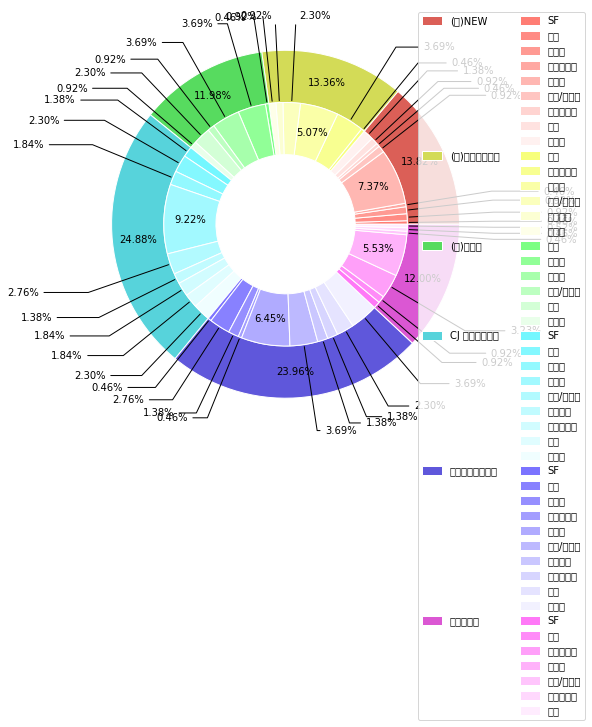

In [ ]:
#방법1 - 도넛 그래프

freq_col = 'num_movies' ## 빈도수 칼럼
outer_col = 'distributor' ## 상위 그룹 칼럼
inner_col = 'genre' ## 하위 그룹 칼럼
 
size = 0.3 ## 바깥쪽, 안쪽 도넛 조각 조각의 반지름 비율을 0.3으로 한다.
threshold = 4 ## 상한선 백분율
 
color = sns.color_palette('hls',len(train_distributor_genre[outer_col].unique())) ## 바깥쪽 도넛의 색상설정
 
summary = train_distributor_genre.groupby(outer_col)[freq_col].sum().reset_index() ## 지역별로 득표수를 집계한다.
outer_data = summary[freq_col] ## 바깥쪽 도넛에 해당하는 데이터
inner_data = [] ## 안쪽 도넛에 대응하는 데이터
for s in summary[outer_col]:
    inner_data += list(train_distributor_genre.query('{0}==@s'.format(outer_col))[freq_col])
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
## 바깥쪽 도넛 조각 차트 출력
out_pie = ax.pie(outer_data,
             radius=1,
             colors=color,
             wedgeprops=dict(width=size,edgecolor='w'))
 
## 바깥쪽 도넛 백분율 텍스트 출력
total = np.sum(outer_data) ## 바깥쪽 빈도수의 총합
 
sum_pct = 0 ## 백분율 초기값
 
for i in range(len(outer_data)):
    ang1, ang2 = out_pie[0][i].theta1, out_pie[0][i].theta2 ## 각1, 각2
    out_r = out_pie[0][i].r ## 원의 반지름
    
    x = ((2*out_r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*out_r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 바깥쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(outer_data) - 1:
        sum_pct += float(f'{outer_data[i]/total*100:.2f}') ## 백분율을 누적한다.
        ax.text(x,y,f'{outer_data[i]/total*100:.2f}%',ha='center',va='center') ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center')
 
outer_color = [] ## 바깥쪽 도넛 조각의 색상을 hsv 컬러로 담을 리스트
for p in out_pie[0]:
    outer_color.append(p.get_facecolor()) ## 바깥쪽 도넛 조각을 rgb 컬러로 가져온다.
outer_color_hsv = [mcl.rgb_to_hsv(x[:3]) for x in outer_color] ## rgb를 hsv로 바꾼다.
outer_color_hsv = [(x[0],x[1],1) for x in outer_color_hsv] ## 색상 채도만 가져오고 명도는 1로 고정한다.
 
inner_color = [] ## 안쪽 도넛 조각의 색상을 담는 리스트
for i, g in enumerate(summary[outer_col]):
    num_sub_group = len(train_distributor_genre.query('{0}==@g'.format(outer_col))) ## 하위 그룹 개수
    jump = outer_color_hsv[i][1]/(num_sub_group+1) ## 채도 등분점 간격
    temp_list = []
    temp_s = np.arange(0,outer_color_hsv[i][1],jump) 
    temp_s = temp_s[1:] ## 채도 등분점
    for t in temp_s:
        h = outer_color_hsv[i][0] ## 색상
        s = t ## 채도
        v = outer_color_hsv[i][2] ## 명도
        temp_list.append((h,s,v))
    inner_color += temp_list[::-1] ## 순서를 바꿈
    
inner_color = [mcl.hsv_to_rgb(x) for x in inner_color] #3 hsv를 다시 rgb로 바꾼다.
 
## 안쪽 도넛 차트 출력
inner_pie = ax.pie(inner_data,
       radius=1-size,
       colors=inner_color,
       wedgeprops=dict(width=size,edgecolor='w'))
 
## 안쪽 도넛 백분율 텍스트 출력
bbox_props = dict(boxstyle='square',fc='w',ec='w',alpha=0) ## annotation 박스 스타일
config = dict(arrowprops=dict(arrowstyle='-'),bbox=bbox_props,va='center')
 
inner_sum_pct = 0 ## 안쪽 도넛 백분율 초기값
for i in range(len(inner_data)):
    ang1, ang2 = inner_pie[0][i].theta1, inner_pie[0][i].theta2 ## 안쪽 각1, 안쪽 각2
    r = inner_pie[0][i].r ## 안쪽 도넛의 반지름
    
    x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 x좌표
    y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 안쪽 도넛 조각의 중앙쪽 y좌표
    
    if i < len(inner_data) - 1:
        inner_sum_pct += float(f'{inner_data[i]/total*100:.2f}') ## 백분율을 누적한다.
        text = f'{inner_data[i]/total*100:.2f}%' ## 백분율 텍스트 표시
    else: ## 총합을 100으로 맞추기위해 마지막 백분율은 100에서 백분율 누적값을 빼준다.
        text = f'{100-inner_sum_pct:.2f}%'
        
    ## 비율 상한선보다 작은 것들은 Annotation으로 만든다.
    if inner_data[i]/total*100 < threshold:
        ang = (ang1+ang2)/2 ## 중심각
        x = out_r*np.cos(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 x좌표
        y = out_r*np.sin(np.deg2rad(ang)) ## Annotation의 끝점에 해당하는 y좌표
        
        ## x좌표가 양수이면 즉 y축을 중심으로 오른쪽에 있으면 왼쪽 정렬
        ## x좌표가 음수이면 즉 y축을 중심으로 왼쪽에 있으면 오른쪽 정렬
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang) ## 시작점과 끝점 연결 스타일
        config["arrowprops"].update({"connectionstyle": connectionstyle}) ## 
        ax.annotate(text, xy=((out_r-size)*x, (out_r-size)*y), xytext=(1.5*x, 1.2*y),
                    horizontalalignment=horizontalalignment, **config)
    else:
        x = ((2*r-size)/2)*np.cos(np.pi/180*((ang1+ang2)/2)) ## 텍스트 x좌표
        y = ((2*r-size)/2)*np.sin(np.pi/180*((ang1+ang2)/2)) ## 텍스트 y좌표
        ax.text(x,y,text,ha='center',va='center')
 
## 범례
## 범례는 2줄로 만든다. 왼쪽 줄에는 상위 그룹을 표시하고 오른쪽 줄에는 하위 그룹을 표시한다.
inner_pie_index = -1 ## 안쪽 도넛 차트의 데이터에 접근할 인덱스 초기값
right_legend_patches = [] ## 오른쪽 범례 칼럼에 들어가는 요소
left_legend_patches = [] ## 왼쪽 범례 칼럼에 들어가는 요소
right_labels = [] ## 오른쪽 범례 칼럼에 들어가는 라벨
left_labels = [] ## 왼쪽 범례 칼러에 들어가는 라벨
for i in range(len(outer_data)):
    left_legend_patches.append(out_pie[0][i])
    
    outer_label = summary[outer_col][i] ## 바깥쪽 도넛 차트 라벨
 
    left_labels.append(outer_label)
    temp_data = train_distributor_genre.query('{0}==@outer_label'.format(outer_col)) ## 바깥쪽 라벨에 대응하는 안쪽 도넛 데이터
    temp_data = temp_data.reset_index(drop=True)
    
    temp_number = len(temp_data)-1
    
    ## 오른쪽 범례 개수와 맞추기 위해 빈 범례를 만듬
    for k in range(temp_number):
        rect = mpt.Rectangle((0,0),1,1.1,facecolor='None')
        left_legend_patches.append(rect)
        left_labels.append('')
    
    ## 오른쪽 범례 칼럼을 만든다.
    for j in range(len(temp_data)):
        inner_pie_index += 1
        
        right_legend_patches.append(inner_pie[0][inner_pie_index])
        right_labels.append(temp_data[inner_col][j])
        
    ## 범례 요소와 라벨을 합친다.
    legend_patches = left_legend_patches+right_legend_patches
    labels = left_labels + right_labels
        
## 범례 출력
plt.legend(legend_patches,
           labels,
           ncol=2,
           loc='upper right',
           handleheight=1, ## 범례 줄 맞춤
           labelspacing=0.5, ## 범례 줄 간격
           bbox_to_anchor=(1.2,1))
 
plt.show()

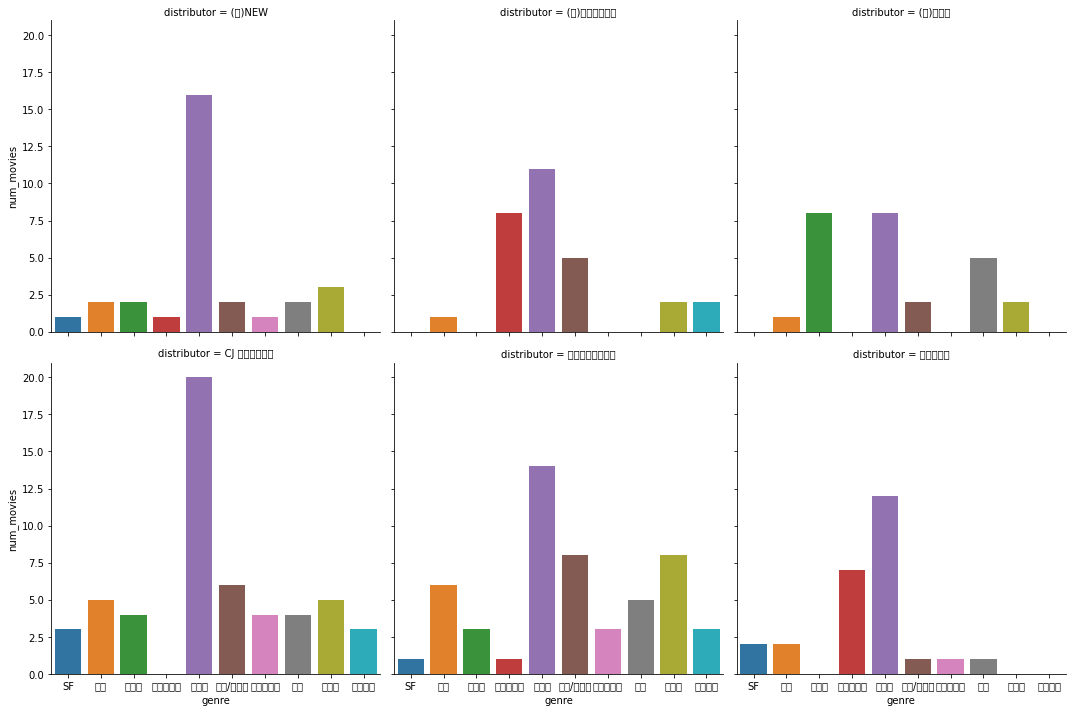

In [ ]:
#방법2 - 배급사별 막대 그래프
ax = sns.catplot(data=train_distributor_genre, x='genre', y='num_movies', kind='bar', col='distributor', col_wrap=3)

#### **5-2) 배급사별 장르 추이: 하위 15개 합**

In [ ]:
#영화를 가장 적게 제작하는 배급사 top15
train['distributor'].value_counts().sort_values(ascending=True)[:15]

이달투            1
(주)씨엠닉스        1
팜코리아미디어        1
(주)로드하우스       1
미라클 필름         1
위드시네마          1
더 피플           1
인피니티엔터테인먼트     1
쟈비스미디어         1
에이블엔터테인먼트      1
(주)이스트스카이필름    1
(주)JK필름        1
사람과 사람들        1
(주)고앤고 필름      1
오퍼스픽쳐스         1
Name: distributor, dtype: int64

In [ ]:
#배급사별 자료 정렬
train_bottom15 = train['distributor'].value_counts().tail(15)

train_dt_genre2 = train.groupby(['distributor', 'genre'])['title'].count().reset_index()
train_dt_genre2.columns = ['distributor', 'genre', 'num_movies']

train_distributor_genre2 = train_dt_genre2[train_dt_genre2['distributor'].isin(train_bottom15.index)].copy() #하위 배급사 자료만

train_distributor_genre2 = pd.DataFrame(train_distributor_genre2.groupby(['genre'])['num_movies'].sum())
train_distributor_genre2

,num_movies
genre,
공포,2
느와르,2
다큐멘터리,3
드라마,5
멜로/로맨스,1
미스터리,1
애니메이션,1


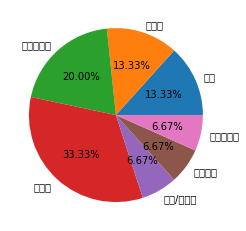

In [ ]:
#파이차트 그리기
ratio = train_distributor_genre2['num_movies']
labels = train_distributor_genre2.index

plt.pie(ratio, labels=labels, autopct='%.2f%%')
plt.show()

#### **5-3) 배급사 점유율과 관객수 비교**

In [ ]:
movie_count_by_dist = pd.DataFrame(train['distributor'].value_counts())
movie_count_by_dist

,distributor
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
(주)쇼박스,26
...,...
OAL(올),1
(주)에이원 엔터테인먼트,1
(주)콘텐츠 윙,1
위더스필름,1


In [ ]:
box_num_by_dist = pd.DataFrame(train.groupby(['distributor'])['box_off_num'].sum())
box_num_by_dist

,box_off_num
distributor,
(주) 브릿지웍스,10795
(주) 액티버스엔터테인먼트,1220
(주) 영화사조제,67718
(주) 영화제작전원사,139540
(주) 케이알씨지,14382
...,...
필름라인,5100
하준사,600
한국YWCA연합회,71


In [ ]:
dist_box = pd.concat([movie_count_by_dist,box_num_by_dist],axis=1)
dist_box

,distributor,box_off_num
CJ 엔터테인먼트,54,116788093
롯데엔터테인먼트,52,64383745
(주)NEW,30,65532145
(주)마운틴픽쳐스,29,937924
(주)쇼박스,26,88053064
...,...,...
OAL(올),1,497994
(주)에이원 엔터테인먼트,1,53235
(주)콘텐츠 윙,1,1079
위더스필름,1,90


Text(0, 0.5, '관객수')

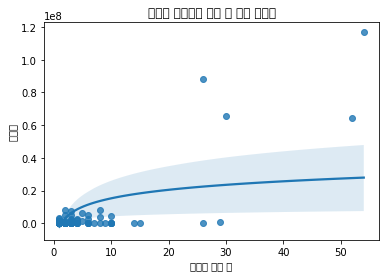

In [ ]:
ax = plt.subplots()
ax = sns.regplot(dist_box['distributor'],dist_box['box_off_num'],logx=True)
ax.set_title('배급사 점유율과 관객 수 간의 산점도')
ax.set_xlabel('상영한 영화 수')
ax.set_ylabel('관객수')

In [ ]:
dist_box[['distributor', 'box_off_num']].corr()

,distributor,box_off_num
distributor,1.000000,0.808073
box_off_num,0.808073,1.000000
